# 1- Loading the data

In [1]:
!kaggle datasets download -d maajdl/yeh-concret-data

  0%|                                               | 0.00/10.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 10.2k/10.2k [00:00<00:00, 28.4MB/s]


In [2]:
!mkdir data

In [3]:
!unzip yeh-concret-data.zip -d ./data

Archive:  yeh-concret-data.zip
  inflating: ./data/Concrete_Data_Yeh.csv  


# 2- Exploratory analysis

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
concrete_df = pd.read_csv("./data/Concrete_Data_Yeh.csv")

In [5]:
concrete_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
concrete_df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
X = concrete_df[concrete_df.columns[:-1]]
y = concrete_df[concrete_df.columns[-1]]

In [10]:
y.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: csMPa, dtype: float64

In [21]:
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


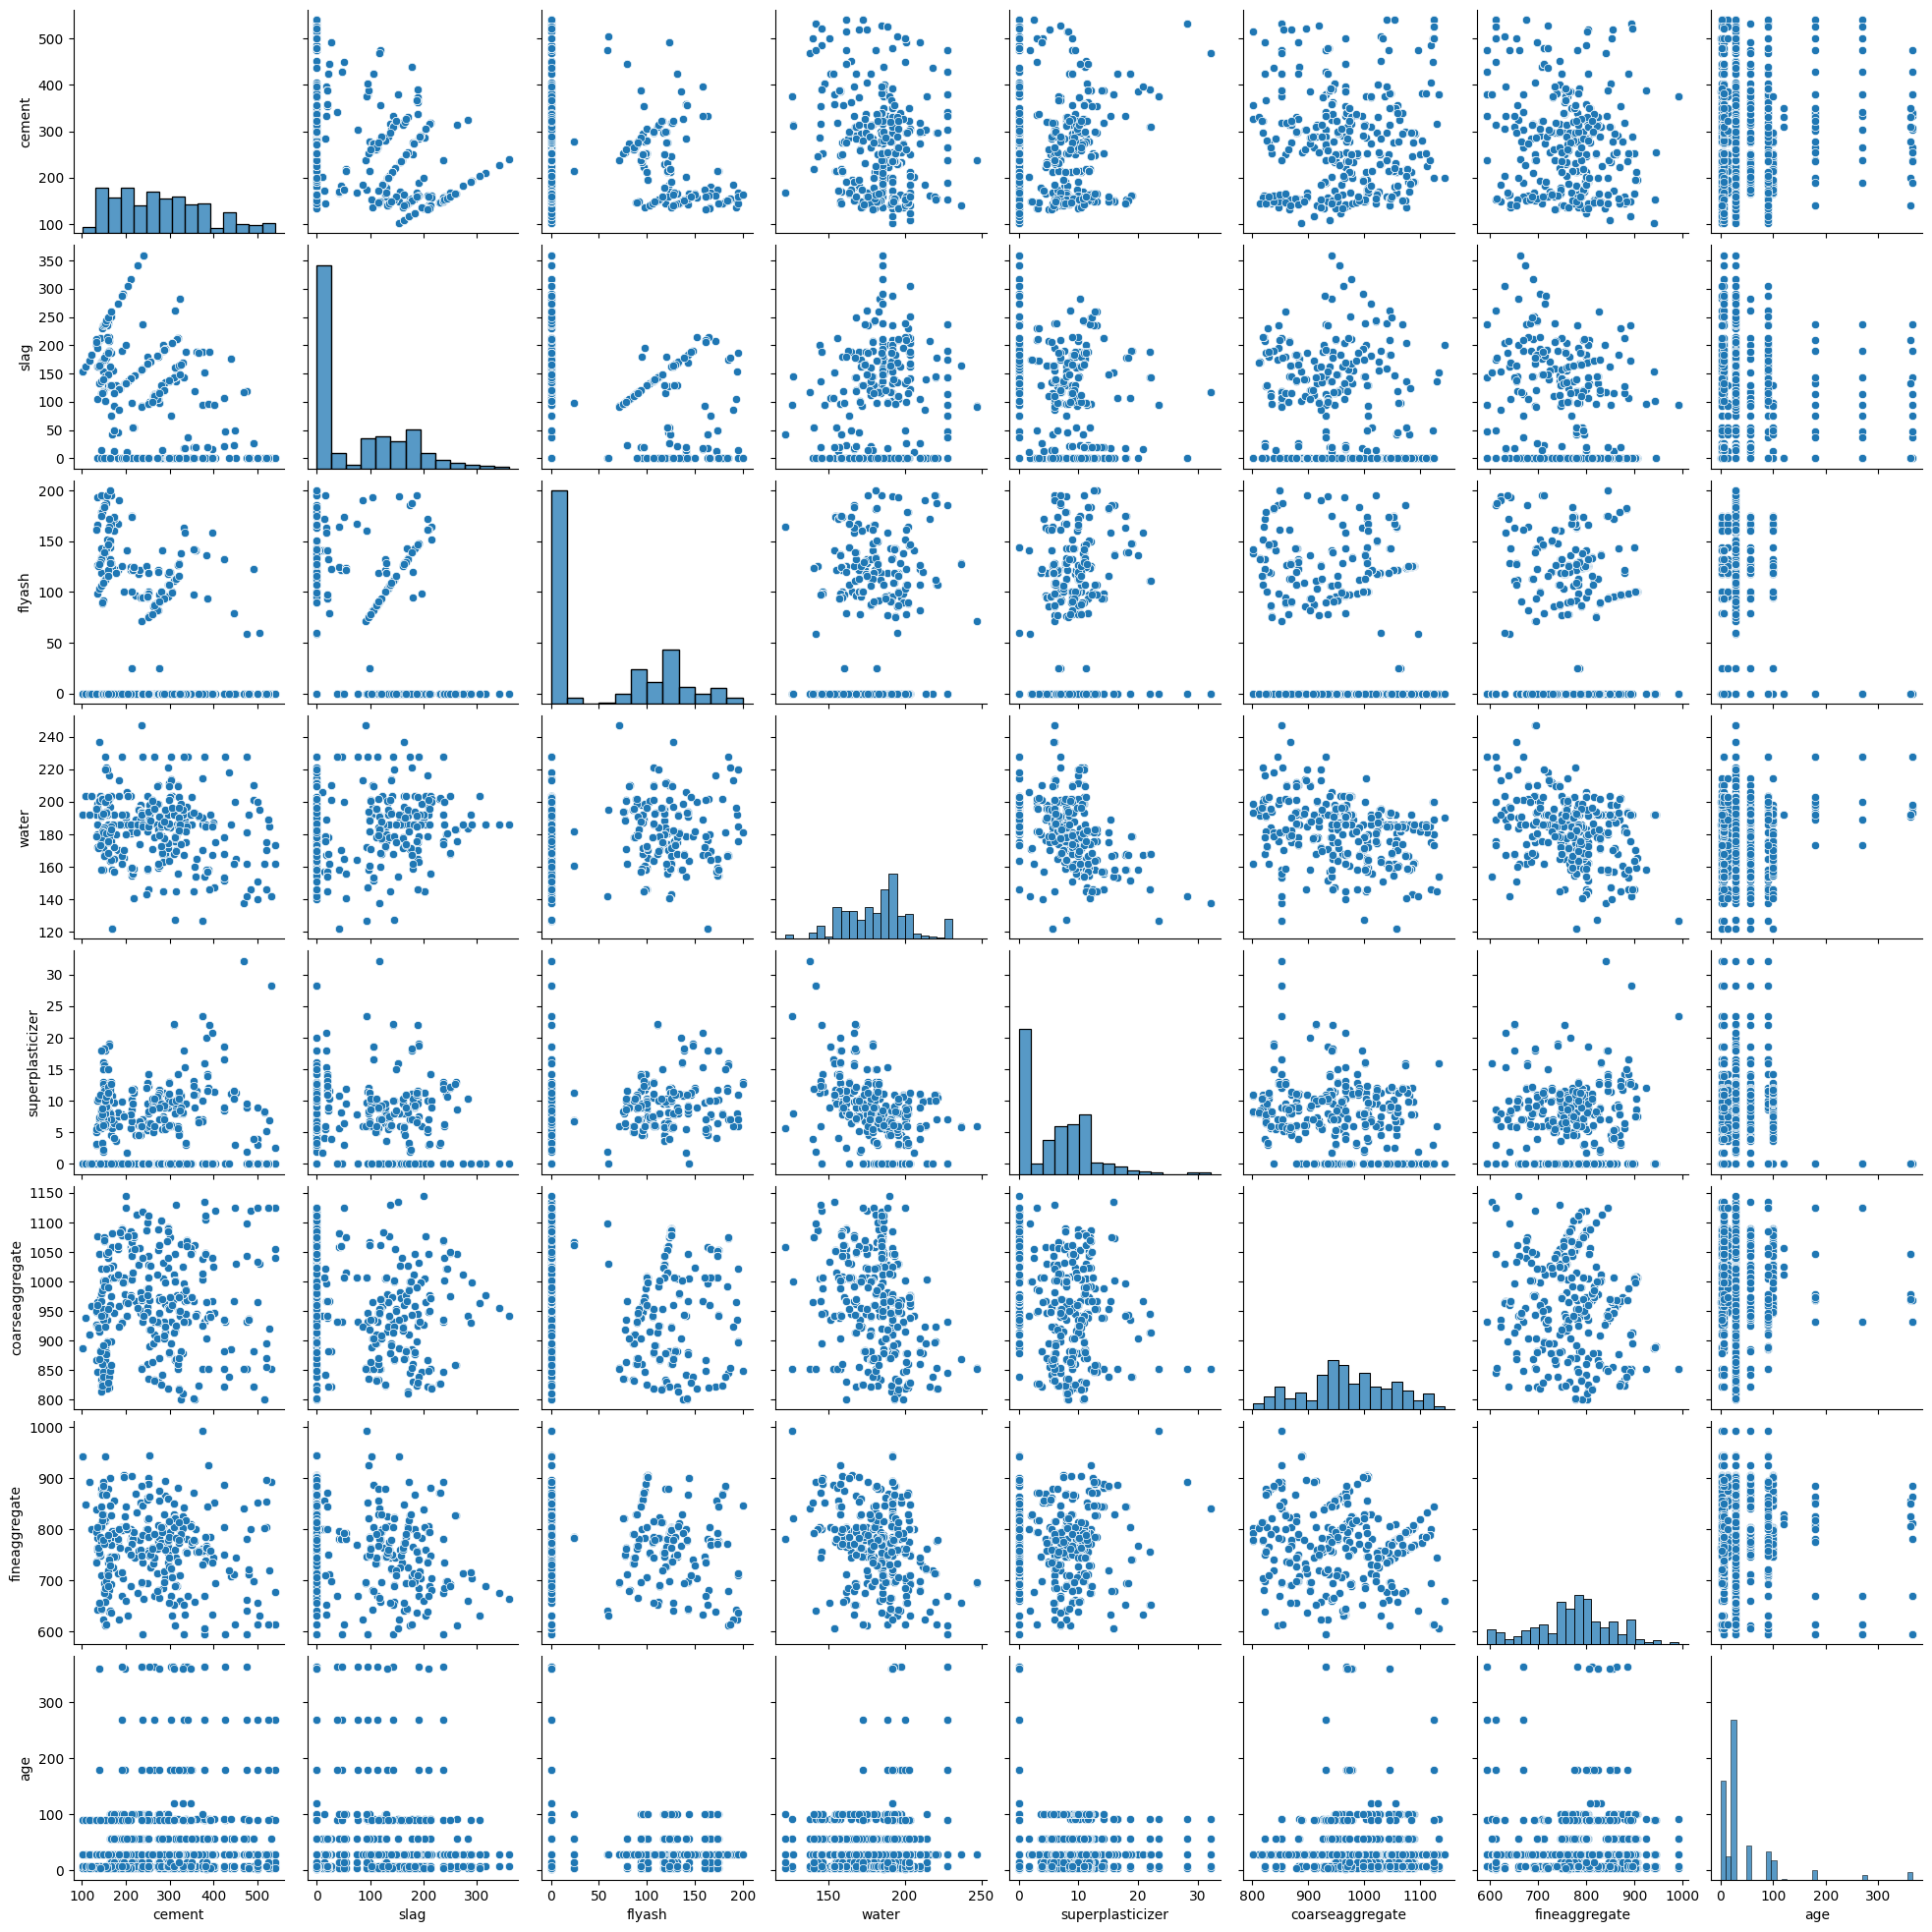

In [11]:
import seaborn as sns

plot = sns.pairplot(X)
plot.figure.savefig("pairplot.png")

In [12]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: csMPa, Length: 1030, dtype: float64

# 3- Applying the Linear model

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [14]:
model = sm.OLS(y, X)
results = model.fit()

In [15]:
results.params

cement              51.360014
slag                36.254931
flyash              16.908658
water              -20.310634
superplasticizer     9.086325
coarseaggregate      5.221238
fineaggregate        6.702080
age                 41.530235
dtype: float64

In [16]:
results.tvalues

cement              30.814167
slag                20.936214
flyash              11.558878
water               -9.934162
superplasticizer     3.190096
coarseaggregate      4.214222
fineaggregate        4.642737
age                 21.084212
dtype: float64

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1733.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):                        0.00
Time:                        02:37:14   Log-Likelihood:                         -3869.0
No. Observations:                1030   AIC:                                      7754.
Df Residuals:                    1022   BIC:                                      7794.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cement              51.3600      1.667     30.814      0.000      48.089      54.631
slag                36.2549      1.732     20.936      0.000      32.857      39.653
flyash              16.9087      1.463     11.559      0.000      14.038      19.779
water              -20.3106      2.045     -9.934      0.000     -24.323     -16.299
superplasticizer     9.0863      2.848      3.190      0.001       3.497      14.675
coarseaggregate      5.2212      1.239      4.214      0.000       2.790       7.652
fineaggregate        6.7021      1.444      4.643      0.000       3.869       9.535
age                 41.5302      1.970     21.084      0.000      37.665      45.395
==============================================================================
Omnibus:                        5.296   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.230
Skew:                          -0.173   Prob(JB):                       0.0732
Kurtosis:                       3.038   Cond. No.                         12.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value (P>|t|) indicates if the predictor has a good chance to not participate of the model. A low value indicates that the predictors has a good chance of participate on the response. All p-values are low which is good and demonstrate that the predictors participate on the model.

In [18]:
#This gives the RSE
np.sqrt(results.scale)

10.394625976143958

In [20]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: csMPa, Length: 1030, dtype: float64

In [23]:
y_pred = results.predict(X)

Variance inflation factors are sometiems useful to assess the effect of collinearity in the model matrix of a regression model. We will compute the VIFs in our multiple regression fit.

In [100]:
vals = [VIF(X, i) for i in range (0, X.shape[1])]

In [101]:
vif = pd.DataFrame ({'vif':vals},index=X.columns [:])

In [102]:
vif

,vif
cement,5.937605
slag,2.854345
flyash,3.580512
water,10.238848
superplasticizer,5.530796
coarseaggregate,4.401647
fineaggregate,4.835068
age,1.669645


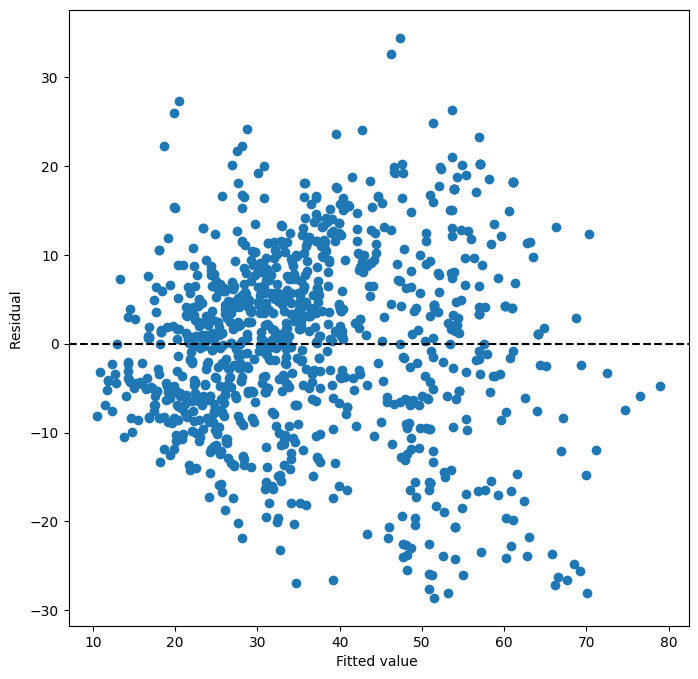

In [103]:
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value ')
ax.set_ylabel('Residual ')
ax.axhline (0, c='k', ls='--');

In [104]:
X.cement

0       1.000000
1       1.000000
2       0.526256
3       0.526256
4       0.220548
          ...   
1025    0.398174
1026    0.502740
1027    0.106164
1028    0.130365
1029    0.362785
Name: cement, Length: 1030, dtype: float64

In [105]:
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264
...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176


In [106]:
a = iter(axs)

In [107]:
axs.flatten()

array([<Axes: xlabel='cement', ylabel='Residual'>, <Axes: xlabel='slag'>,
       <Axes: xlabel='flyash'>, <Axes: xlabel='water'>,
       <Axes: xlabel='superplasticizer', ylabel='Residual'>,
       <Axes: xlabel='coarseaggregate'>, <Axes: xlabel='fineaggregate'>,
       <Axes: xlabel='age'>], dtype=object)

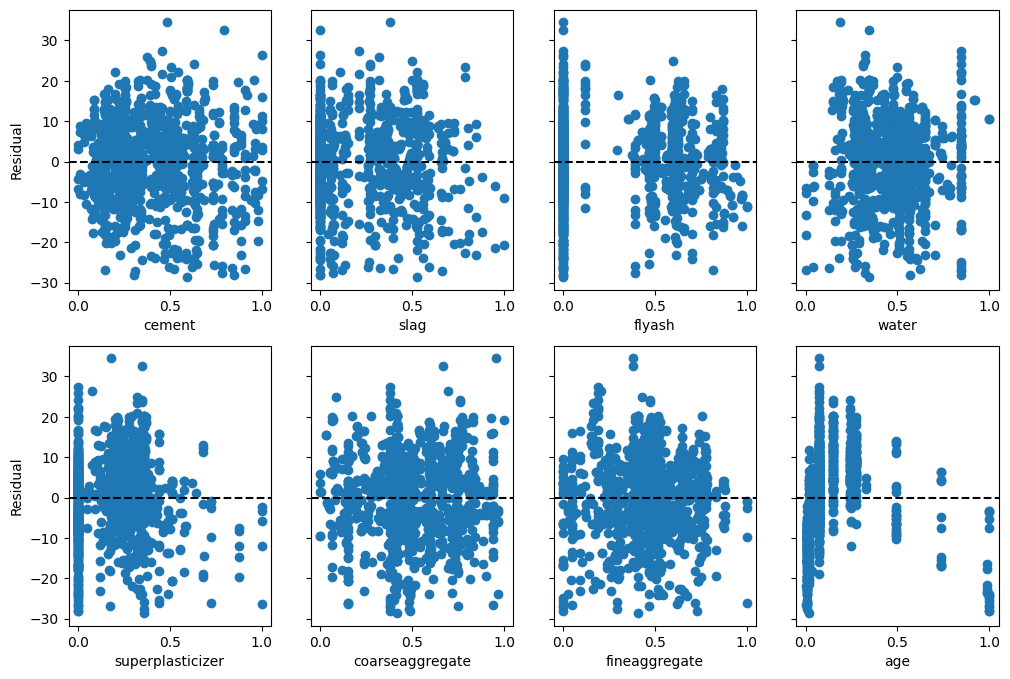

In [108]:
fig, axs = subplots(2,4,figsize =(12 ,8), sharey=True)
axs[0][0].set_ylabel('Residual')
axs[1][0].set_ylabel('Residual')
for ax, column_name in zip(axs.flatten(), X.columns):
    ax.scatter( X[column_name], results.resid)
    ax.set_xlabel(f'{column_name}')
    #ax.set_ylabel('Residual ')
    ax.axhline (0, c='k', ls='--');

66

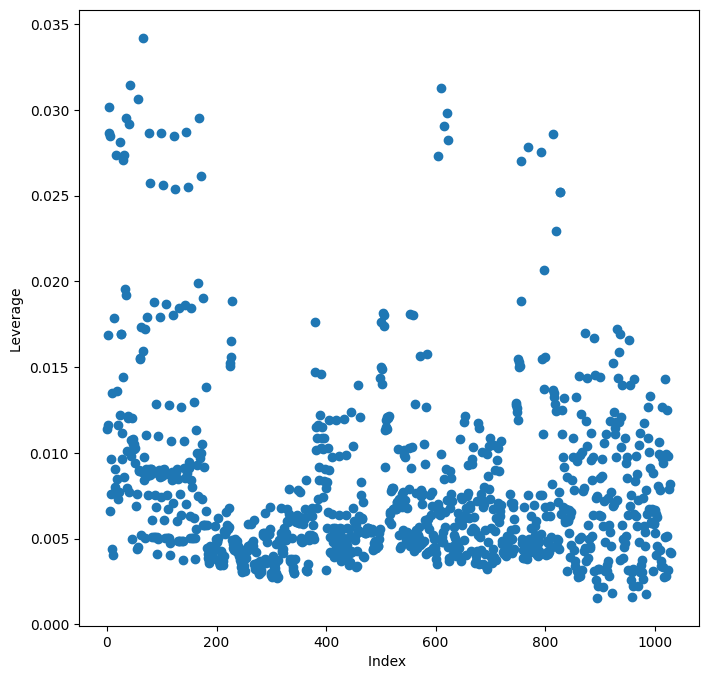

In [110]:
infl = results.get_influence()
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl.hat_matrix_diag)
ax.set_xlabel('Index ')
ax.set_ylabel('Leverage ')
np.argmax(infl.hat_matrix_diag)